# Importando

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Lendo dados

In [9]:
db = pd.read_csv('statlog-heart-dataset.csv')

db

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,49,1,2,130,266,0,0,171,0,0.6,1,0,3,no
266,52,1,3,172,199,1,0,162,0,0.5,1,0,7,no
267,44,1,2,120,263,0,0,173,0,0.0,1,0,7,no
268,56,0,2,140,294,0,2,153,0,1.3,2,0,3,no


# Função para simplificar

In [10]:
def machine_learning_default(db,
                             target,
                             classifier = DecisionTreeClassifier(),
                             test_size=0.75,
                             random_state=42):
    X = db.drop(target, axis=1)
    y = db[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    y_scores = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label='yes')
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) - Decision Tree')
    plt.legend(loc="lower right")
    plt.show()
    return clf

# Decision Tree

              precision    recall  f1-score   support

          no       0.76      0.65      0.70       113
         yes       0.63      0.73      0.68        90

    accuracy                           0.69       203
   macro avg       0.69      0.69      0.69       203
weighted avg       0.70      0.69      0.69       203

[[74 39]
 [24 66]]


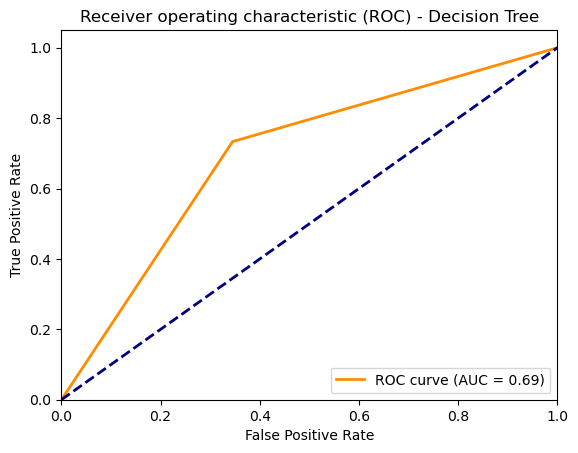

DecisionTreeClassifier()

In [11]:
machine_learning_default(db, 'class', DecisionTreeClassifier())

# Random Forest

              precision    recall  f1-score   support

          no       0.80      0.89      0.84       113
         yes       0.84      0.71      0.77        90

    accuracy                           0.81       203
   macro avg       0.82      0.80      0.81       203
weighted avg       0.82      0.81      0.81       203

[[101  12]
 [ 26  64]]


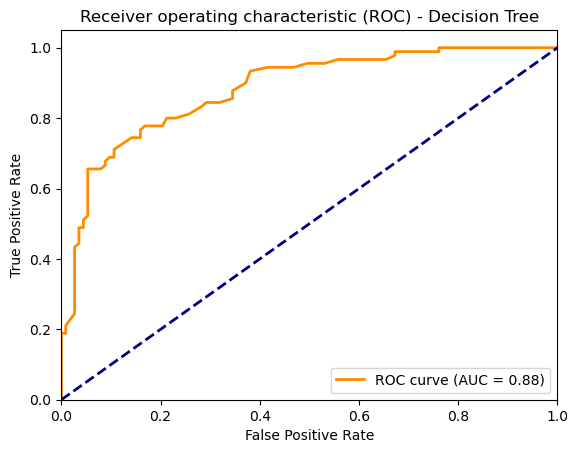

RandomForestClassifier()

In [12]:
machine_learning_default(db, 'class', RandomForestClassifier())

# Logistic Regression

              precision    recall  f1-score   support

          no       0.81      0.85      0.83       113
         yes       0.80      0.76      0.78        90

    accuracy                           0.81       203
   macro avg       0.81      0.80      0.80       203
weighted avg       0.81      0.81      0.81       203

[[96 17]
 [22 68]]


c:\Users\rmnf\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


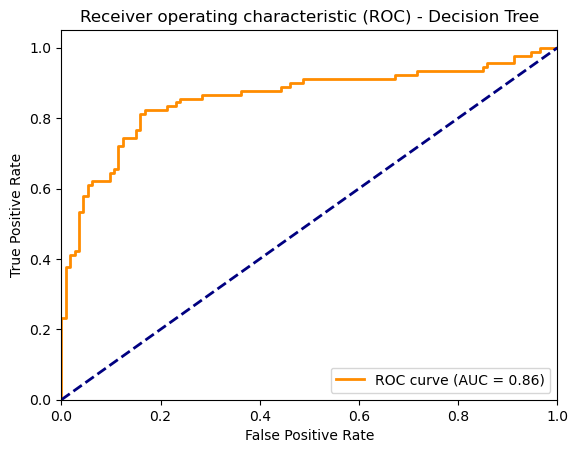

LogisticRegression()

In [13]:
machine_learning_default(db, 'class', LogisticRegression())

# KNN

              precision    recall  f1-score   support

          no       0.60      0.60      0.60       113
         yes       0.50      0.50      0.50        90

    accuracy                           0.56       203
   macro avg       0.55      0.55      0.55       203
weighted avg       0.56      0.56      0.56       203

[[68 45]
 [45 45]]


c:\Users\rmnf\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


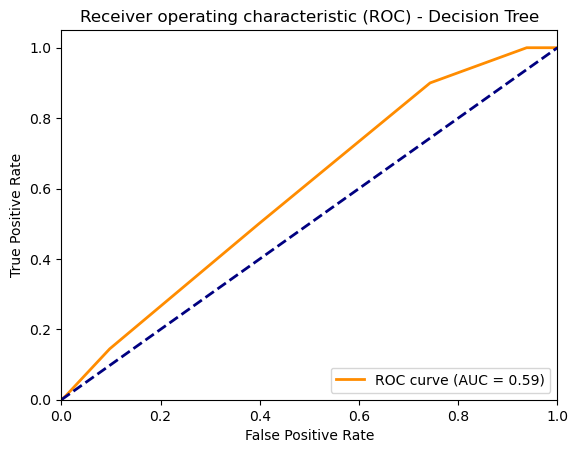

KNeighborsClassifier()

In [14]:
machine_learning_default(db, 'class', KNeighborsClassifier())

# Naive-Bayes

              precision    recall  f1-score   support

          no       0.83      0.78      0.80       113
         yes       0.74      0.80      0.77        90

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203

[[88 25]
 [18 72]]


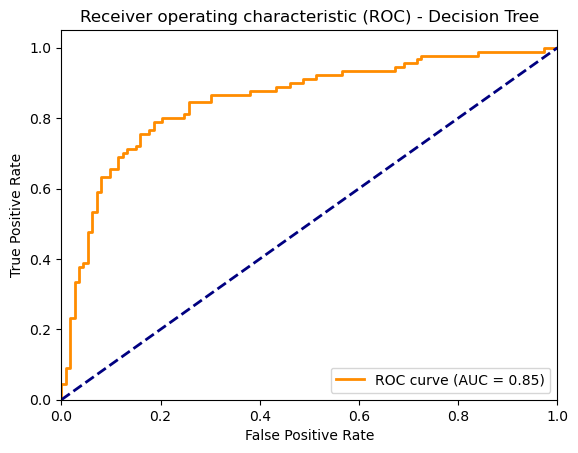

GaussianNB()

In [15]:
machine_learning_default(db, 'class', GaussianNB())